In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('dataset_1_3_removedzero.csv')

In [4]:
l = list(range(1,41))
np.random.seed(101)
row_blind = list(np.random.randint(1,40,5))
row_blind
row_rem = []
for item in l:
    if item not in row_blind :
        row_rem.append(item)

df_three = df[df['Label']==-1]
df_three.index

index_three = list(df_three.index)
index_three 

print(index_three)

##generate 5 random indices that will serve as location to the list index_three for blind set
np.random.seed(0)
indices_blind = list(np.random.randint(1,len(index_three),5))

print(indices_blind)

##for the blind index get the 5 rows for the blind set having label 3
row_blind_three=[]
for index in indices_blind:
    row_blind_three.append(index_three[index])
    
print(row_blind_three)

##get the remaining rows having label3 which do not form the blind set 
row_rem_three=[]
for item in index_three:
    if item not in indices_blind:
        row_rem_three.append(item)
        
print(row_rem_three)


df_one = df[df['Label']==1]
df_one.index

index_one = list(df_one.index)
index_one

print(index_one)

##generate 5 random indices that will serve as location to the list index_one for blind set
np.random.seed(101)
indices_blind = list(np.random.randint(1,len(index_one),5))

print(indices_blind)

##for the blind index get the 5 rows for the blind set having label 1
row_blind_one=[]
for index in indices_blind:
    row_blind_one.append(index_one[index])
    
print(row_blind_one)

##get the remaining rows having label 1 which do not form the blind set 
row_rem_one=[]
for item in index_one:
    if item not in indices_blind:
        row_rem_one.append(item)
        
print(row_rem_one)

[0, 3, 5, 8, 9, 11, 12, 13, 14, 15, 16, 19, 21, 22, 23, 24, 25, 26, 28, 29, 32, 33, 34, 35, 36, 37, 38, 39]
[13, 16, 22, 1, 4]
[22, 25, 34, 3, 9]
[0, 3, 5, 8, 9, 11, 12, 14, 15, 19, 21, 23, 24, 25, 26, 28, 29, 32, 33, 34, 35, 36, 37, 38, 39]
[1, 2, 4, 6, 7, 10, 17, 18, 20, 27, 30, 31]
[2, 7, 8, 10, 9]
[4, 18, 20, 30, 27]
[1, 4, 6, 17, 18, 20, 27, 30, 31]


In [5]:
blind3_X = pd.DataFrame(df_three.drop('Label',axis=1),index=row_blind_three)
blind3_y = pd.DataFrame(df_three['Label'],index=row_blind_three)

In [6]:
rem3_X = pd.DataFrame(df_three.drop('Label',axis=1),index=row_rem_three)
rem3_y = pd.DataFrame(df_three['Label'],index=row_rem_three)

In [7]:
blind1_X = pd.DataFrame(df_one.drop('Label',axis=1),index=row_blind_one)
blind1_y = pd.DataFrame(df_one['Label'],index=row_blind_one)

In [8]:
rem1_X = pd.DataFrame(df_one.drop('Label',axis=1),index=row_rem_one)
rem1_y = pd.DataFrame(df_one['Label'],index=row_rem_one)

In [9]:
row_rem = row_rem_one + row_rem_three

In [10]:
df_new = pd.DataFrame(df,index=row_rem)

In [11]:
X = df_new.drop('Label',axis=1)
y = df_new['Label']

In [12]:
df_csv = pd.DataFrame(index=range(0,40),columns=['Threshold','Accuracy','Sensitivity','Specificity','PPV'])

In [13]:
from sklearn.svm import SVC

In [14]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,confusion_matrix,classification_report

In [15]:
from sklearn.model_selection import StratifiedKFold

In [16]:
skf=StratifiedKFold(n_splits=10)

In [17]:
skf.get_n_splits(X, y)

10

In [18]:
y_pred=[]
accuracy=[]
sens=[]
spec=[]
threshold=[]
model_num=-1

def predict(des, threshold):
    if des < threshold:
        y_pred.append(-1)
    else:
        y_pred.append(1)


for train_index, test_index in skf.split(X, y):
        
    print("TRAIN:", train_index, "TEST:", test_index)
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model_num=model_num+1
    if(model_num<10):
        
        model = SVC(class_weight='balanced',C=0.1,kernel='linear')

        model.fit(X_train,y_train)

        des = model.decision_function(X_test)
        
        pred = model.predict(X_test)
        
#         fig=plt.figure(figsize=(6,6))
#         sns.heatmap(confusion_matrix(y_test,pred),annot=True,xticklabels=[-1,1],yticklabels=[-1,1],vmin=0.0,vmax=3.0)
#         fig.savefig('heatmap_10cross_SVM_{}.png'.format(model_num))
        
        df_csv = pd.DataFrame(index=range(0,40),columns=['Threshold','Accuracy','Sensitivity','Specificity','PPV'])

        i=0      
        for t in np.arange(-2, 3, 0.1):
            y_pred = []
            for value in des:
                predict(value,t)

            acc = accuracy_score(y_test,y_pred)
            cm = confusion_matrix(y_test,y_pred)
            if(np.shape(cm)==(2,2)):
                tn, fp, fn, tp = cm.ravel()
                sensitivity = tp/(tp+fn)
                specificity = tn/(tn+fp)
                ppv = tp/(tp+fp)
            print(cm)
#             elif cm[0]==1:
#                 sensitivity = 
#                 specificity =int(cm.ravel())
#                 ppv =1 
#             threshold.append(t)
#             accuracy.append(acc)
#             sens.append(sensitivity)
#             spec.append(specificity)

#             if(i<40):
#                 df_csv.iloc[i]['Threshold']=t    
#                 df_csv.iloc[i]['Accuracy']=acc
#                 df_csv.iloc[i]['Sensitivity']=sensitivity
#                 df_csv.iloc[i]['Specificity']=specificity
#                 df_csv.iloc[i]['PPV']=ppv

#             i=i+1   
    
#         df_csv.fillna(value=1,inplace=True)
#         df_csv.to_csv('threshold_plot_k10_SVM_{}.csv'.format(model_num),index=False)
    
    
   
    
   

C:\Users\Umaima\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


TRAIN: [ 1  2  3  4  5  6  7  8 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27
 28 29 30 31 32 33] TEST: [ 0  9 10 11]
[[0 3]
 [0 1]]
[[0 3]
 [0 1]]
[[0 3]
 [0 1]]
[[0 3]
 [0 1]]
[[0 3]
 [0 1]]
[[0 3]
 [0 1]]
[[0 3]
 [0 1]]
[[0 3]
 [0 1]]
[[0 3]
 [0 1]]
[[0 3]
 [0 1]]
[[0 3]
 [0 1]]
[[0 3]
 [1 0]]
[[0 3]
 [1 0]]
[[0 3]
 [1 0]]
[[0 3]
 [1 0]]
[[0 3]
 [1 0]]
[[0 3]
 [1 0]]
[[1 2]
 [1 0]]
[[2 1]
 [1 0]]
[[2 1]
 [1 0]]
[[2 1]
 [1 0]]
[[2 1]
 [1 0]]
[[2 1]
 [1 0]]
[[3 0]
 [1 0]]
[[3 0]
 [1 0]]
[[3 0]
 [1 0]]
[[3 0]
 [1 0]]
[[3 0]
 [1 0]]
[[3 0]
 [1 0]]
[[3 0]
 [1 0]]
[[3 0]
 [1 0]]
[[3 0]
 [1 0]]
[[3 0]
 [1 0]]
[[3 0]
 [1 0]]
[[3 0]
 [1 0]]
[[3 0]
 [1 0]]
[[3 0]
 [1 0]]
[[3 0]
 [1 0]]
[[3 0]
 [1 0]]
[[3 0]
 [1 0]]
[[3 0]
 [1 0]]
[[3 0]
 [1 0]]
[[3 0]
 [1 0]]
[[3 0]
 [1 0]]
[[3 0]
 [1 0]]
[[3 0]
 [1 0]]
[[3 0]
 [1 0]]
[[3 0]
 [1 0]]
[[3 0]
 [1 0]]
[[3 0]
 [1 0]]
TRAIN: [ 0  2  3  4  5  6  7  8  9 10 11 15 16 17 18 19 20 21 22 23 24 25 26 27
 28 29 30 31 32 33] TEST: [ 1 12 13 14]
[[0 3]
 [0

C:\Users\Umaima\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: invalid value encountered in longlong_scalars
C:\Users\Umaima\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: invalid value encountered in longlong_scalars



[[2 1]
 [1 0]]
[[2 1]
 [1 0]]
[[2 1]
 [1 0]]
[[2 1]
 [1 0]]
[[3 0]
 [1 0]]
[[3 0]
 [1 0]]
[[3 0]
 [1 0]]
[[3 0]
 [1 0]]
[[3 0]
 [1 0]]
[[3 0]
 [1 0]]
[[3 0]
 [1 0]]
[[3 0]
 [1 0]]
[[3 0]
 [1 0]]
[[3 0]
 [1 0]]
[[3 0]
 [1 0]]
[[3 0]
 [1 0]]
[[3 0]
 [1 0]]
[[3 0]
 [1 0]]
[[3 0]
 [1 0]]
[[3 0]
 [1 0]]
[[3 0]
 [1 0]]
[[3 0]
 [1 0]]
[[3 0]
 [1 0]]
[[3 0]
 [1 0]]
[[3 0]
 [1 0]]
[[3 0]
 [1 0]]
[[3 0]
 [1 0]]
[[3 0]
 [1 0]]
[[3 0]
 [1 0]]
[[3 0]
 [1 0]]
[[3 0]
 [1 0]]
[[3 0]
 [1 0]]
[[3 0]
 [1 0]]
[[3 0]
 [1 0]]
[[3 0]
 [1 0]]
TRAIN: [ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 18 19 20 21 22 23 24 25 26 27
 28 29 30 31 32 33] TEST: [ 2 15 16 17]
[[0 3]
 [0 1]]
[[0 3]
 [0 1]]
[[0 3]
 [0 1]]
[[0 3]
 [0 1]]
[[1 2]
 [0 1]]
[[1 2]
 [0 1]]
[[1 2]
 [1 0]]
[[1 2]
 [1 0]]
[[1 2]
 [1 0]]
[[1 2]
 [1 0]]
[[1 2]
 [1 0]]
[[1 2]
 [1 0]]
[[2 1]
 [1 0]]
[[2 1]
 [1 0]]
[[2 1]
 [1 0]]
[[2 1]
 [1 0]]
[[2 1]
 [1 0]]
[[2 1]
 [1 0]]
[[2 1]
 [1 0]]
[[2 1]
 [1 0]]
[[2 1]
 [1 0]]
[[2 1]
 [1 0]]
[[2 1]
 [1 0]]
[[2 1]
 [

C:\Users\Umaima\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: invalid value encountered in longlong_scalars
C:\Users\Umaima\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: invalid value encountered in longlong_scalars



[[3 0]
 [1 0]]
[[3 0]
 [1 0]]
[[3 0]
 [1 0]]
[[3 0]
 [1 0]]
[[3 0]
 [1 0]]
[[3 0]
 [1 0]]
[[3 0]
 [1 0]]
[[3 0]
 [1 0]]
[[3 0]
 [1 0]]
[[3 0]
 [1 0]]
[[3 0]
 [1 0]]
[[3 0]
 [1 0]]
[[3 0]
 [1 0]]
TRAIN: [ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 21 22 23 24 25 26 27
 28 29 30 31 32 33] TEST: [ 3 18 19 20]
[[0 3]
 [0 1]]
[[0 3]
 [0 1]]
[[0 3]
 [0 1]]
[[0 3]
 [0 1]]
[[1 2]
 [0 1]]
[[1 2]
 [0 1]]
[[1 2]
 [0 1]]
[[1 2]
 [0 1]]
[[1 2]
 [0 1]]
[[1 2]
 [0 1]]
[[1 2]
 [0 1]]
[[1 2]
 [0 1]]
[[1 2]
 [0 1]]
[[1 2]
 [0 1]]
[[1 2]
 [0 1]]
[[1 2]
 [0 1]]
[[1 2]
 [0 1]]
[[2 1]
 [0 1]]
[[2 1]
 [0 1]]
[[2 1]
 [0 1]]
[[2 1]
 [1 0]]
[[2 1]
 [1 0]]
[[2 1]
 [1 0]]
[[2 1]
 [1 0]]
[[2 1]
 [1 0]]
[[2 1]
 [1 0]]
[[2 1]
 [1 0]]
[[2 1]
 [1 0]]
[[2 1]
 [1 0]]
[[2 1]
 [1 0]]
[[2 1]
 [1 0]]
[[2 1]
 [1 0]]
[[2 1]
 [1 0]]
[[2 1]
 [1 0]]
[[2 1]
 [1 0]]
[[3 0]
 [1 0]]
[[3 0]
 [1 0]]
[[3 0]
 [1 0]]
[[3 0]
 [1 0]]
[[3 0]
 [1 0]]
[[3 0]
 [1 0]]

C:\Users\Umaima\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: invalid value encountered in longlong_scalars



[[3 0]
 [1 0]]
[[3 0]
 [1 0]]
[[3 0]
 [1 0]]
[[3 0]
 [1 0]]
[[3 0]
 [1 0]]
[[3 0]
 [1 0]]
[[3 0]
 [1 0]]
[[3 0]
 [1 0]]
[[3 0]
 [1 0]]
TRAIN: [ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 24 25 26 27
 28 29 30 31 32 33] TEST: [ 4 21 22 23]
[[0 3]
 [1 0]]
[[0 3]
 [1 0]]
[[0 3]
 [1 0]]
[[0 3]
 [1 0]]
[[0 3]
 [1 0]]
[[0 3]
 [1 0]]
[[0 3]
 [1 0]]
[[0 3]
 [1 0]]
[[0 3]
 [1 0]]
[[0 3]
 [1 0]]
[[1 2]
 [1 0]]
[[2 1]
 [1 0]]
[[2 1]
 [1 0]]
[[2 1]
 [1 0]]
[[2 1]
 [1 0]]
[[2 1]
 [1 0]]
[[2 1]
 [1 0]]
[[2 1]
 [1 0]]
[[2 1]
 [1 0]]
[[2 1]
 [1 0]]
[[3 0]
 [1 0]]
[[3 0]
 [1 0]]
[[3 0]
 [1 0]]
[[3 0]
 [1 0]]
[[3 0]
 [1 0]]
[[3 0]
 [1 0]]
[[3 0]
 [1 0]]
[[3 0]
 [1 0]]
[[3 0]
 [1 0]]
[[3 0]
 [1 0]]
[[3 0]
 [1 0]]
[[3 0]
 [1 0]]
[[3 0]
 [1 0]]
[[3 0]
 [1 0]]
[[3 0]
 [1 0]]
[[3 0]
 [1 0]]
[[3 0]
 [1 0]]
[[3 0]
 [1 0]]
[[3 0]
 [1 0]]
[[3 0]
 [1 0]]
[[3 0]
 [1 0]]
[[3 0]
 [1 0]]
[[3 0]
 [1 0]]
[[3 0]
 [1 0]]
[[3 0]
 [1 0]]
[[3 0]
 [1 0]]
[[3 0]
 [1 0]]
[[3 0]
 [1 0]]
[[3 0]
 [1 0]]
[[3 0]
 [

C:\Users\Umaima\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: invalid value encountered in longlong_scalars
C:\Users\Umaima\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: invalid value encountered in longlong_scalars



[[2 0]
 [1 0]]
[[2 0]
 [1 0]]
[[2 0]
 [1 0]]
[[2 0]
 [1 0]]
[[2 0]
 [1 0]]
[[2 0]
 [1 0]]
[[2 0]
 [1 0]]
[[2 0]
 [1 0]]
[[2 0]
 [1 0]]
[[2 0]
 [1 0]]
[[2 0]
 [1 0]]
[[2 0]
 [1 0]]
[[2 0]
 [1 0]]
[[2 0]
 [1 0]]
[[2 0]
 [1 0]]
[[2 0]
 [1 0]]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 30 31 32 33] TEST: [ 7 28 29]
[[0 2]
 [0 1]]
[[0 2]
 [0 1]]
[[0 2]
 [0 1]]
[[0 2]
 [0 1]]
[[0 2]
 [0 1]]
[[0 2]
 [0 1]]
[[0 2]
 [0 1]]
[[0 2]
 [0 1]]
[[0 2]
 [0 1]]
[[0 2]
 [0 1]]
[[0 2]
 [0 1]]
[[0 2]
 [0 1]]
[[0 2]
 [0 1]]
[[1 1]
 [0 1]]
[[1 1]
 [0 1]]
[[2 0]
 [0 1]]
[[2 0]
 [0 1]]
[[2 0]
 [0 1]]
[[2 0]
 [0 1]]
[[2 0]
 [0 1]]
[[2 0]
 [0 1]]
[[2 0]
 [0 1]]
[[2 0]
 [0 1]]
[[2 0]
 [0 1]]
[[2 0]
 [1 0]]
[[2 0]
 [1 0]]
[[2 0]
 [1 0]]
[[2 0]
 [1 0]]
[[2 0]
 [1 0]]
[[2 0]
 [1 0]]
[[2 0]
 [1 0]]
[[2 0]
 [1 0]]
[[2 0]
 [1 0]]
[[2 0]
 [1 0]]
[[2 0]
 [1 0]]
[[2 0]
 [1 0]]
[[2 0]
 [1 0]]
[[2 0]
 [1 0]]
[[2 0]
 [1 0]]
[[2 0]
 [1 0]]
[[2 0]
 [1 0]]
[[2 0]
 [1 0]]
[[2 0]
 [

C:\Users\Umaima\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: invalid value encountered in longlong_scalars
C:\Users\Umaima\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: invalid value encountered in longlong_scalars



[[0 2]
 [0 1]]
[[0 2]
 [0 1]]
[[0 2]
 [0 1]]
[[0 2]
 [0 1]]
[[0 2]
 [0 1]]
[[0 2]
 [0 1]]
[[0 2]
 [0 1]]
[[0 2]
 [0 1]]
[[0 2]
 [0 1]]
[[0 2]
 [0 1]]
[[1 1]
 [0 1]]
[[1 1]
 [0 1]]
[[1 1]
 [1 0]]
[[1 1]
 [1 0]]
[[1 1]
 [1 0]]
[[1 1]
 [1 0]]
[[1 1]
 [1 0]]
[[1 1]
 [1 0]]
[[1 1]
 [1 0]]
[[1 1]
 [1 0]]
[[1 1]
 [1 0]]
[[2 0]
 [1 0]]
[[2 0]
 [1 0]]
[[2 0]
 [1 0]]
[[2 0]
 [1 0]]
[[2 0]
 [1 0]]
[[2 0]
 [1 0]]
[[2 0]
 [1 0]]
[[2 0]
 [1 0]]
[[2 0]
 [1 0]]
[[2 0]
 [1 0]]
[[2 0]
 [1 0]]
[[2 0]
 [1 0]]
[[2 0]
 [1 0]]
[[2 0]
 [1 0]]
[[2 0]
 [1 0]]
[[2 0]
 [1 0]]
[[2 0]
 [1 0]]
[[2 0]
 [1 0]]
[[2 0]
 [1 0]]
[[2 0]
 [1 0]]
[[2 0]
 [1 0]]
[[2 0]
 [1 0]]
[[2 0]
 [1 0]]
[[2 0]
 [1 0]]
[[2 0]
 [1 0]]
[[2 0]
 [1 0]]
[[2 0]
 [1 0]]
[[2 0]
 [1 0]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31] TEST: [32 33]
[[0 2]
 [0 0]]
[[0 2]
 [0 0]]
[[0 2]
 [0 0]]
[[0 2]
 [0 0]]
[[0 2]
 [0 0]]
[[0 2]
 [0 0]]
[[0 2]
 [0 0]]
[[0 2]
 [0 0]]
[[0 2]
 [0 0]]
[[0 2]
 [

C:\Users\Umaima\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in longlong_scalars


In [19]:
df_avg =pd.DataFrame(index=range(0,40),columns=['Threshold','Accuracy','Sensitivity','Specificity','PPV'])

for row in range(0,40):
    sum_acc=sum_sens=sum_spec=avg_acc=avg_sens=avg_spec=0
    for i in range(0,10):
        f_i = pd.read_csv('threshold_plot_k10_SVM_{}.csv'.format(i))
        
        sum_acc = sum_acc + f_i['Accuracy'][row]
        sum_sens = sum_sens + f_i['Sensitivity'][row]
        sum_spec = sum_spec + f_i['Specificity'][row]
        sum_ppv = sum_ppv +f_i['PPV'][row]
    
    avg_acc = sum_acc/10
    avg_sens = sum_sens/10
    avg_spec = sum_spec/10
    avg_ppv  = sum_ppv/10
    
    df_avg.iloc[row]['Threshold'] = df_csv.iloc[row]['Threshold']
    df_avg.iloc[row]['Accuracy'] = avg_acc
    df_avg.iloc[row]['Sensitivity'] = avg_sens
    df_avg.iloc[row]['Specificity'] = avg_spec
    df_avg.iloc[row]['PPV'] = avg_ppv
    
df_avg.to_csv('threshold_plot_Avg_K10.csv',index=False)


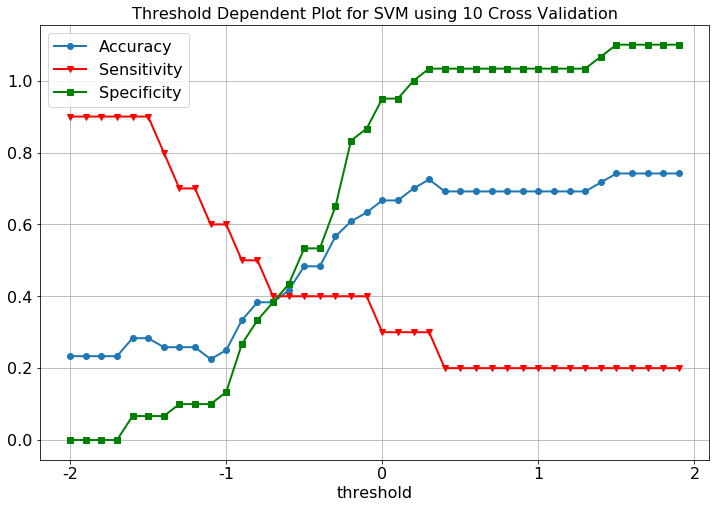

In [20]:
fig=plt.figure(figsize=(12,8))

x = [-2,-1,0,1,2]
y = [0.0,0.2,0.4,0.6,0.8,1.0,1.2]
# create an index for each tick position
xi = [i for i in x]
yi = [i for i in y]

# plot the index for the x-values
plt.plot(df_avg['Threshold'],df_avg['Accuracy'], 'o-' ,label='Accuracy', lw=2)
plt.plot(df_avg['Threshold'],df_avg['Sensitivity'], 'v-', color='red',label='Sensitivity', lw=2)
plt.plot(df_avg['Threshold'],df_avg['Specificity'], 's-',  color='green',label='Specificity', lw=2)

plt.xticks(xi, x,fontsize=16)
plt.yticks(fontsize=16)
plt.title('Threshold Dependent Plot for SVM using 10 Cross Validation', fontsize= 16)
plt.xlabel('threshold', fontsize= 16)
plt.legend(fontsize= 16) 
plt.grid()
plt.show()


In [21]:
fig.savefig('threshold_plot_10cross_validation_SVM.png',dpi=300)